In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_excel(r'C:/Users/Lenovo-PC/Desktop/股票型基金经理_完整特征.xlsx')

In [6]:
data

,经验值,绩效点,风控能力,稳定性,跳槽频率,人气指数,1年内夏普比率,基金经理总收益,从业,数,年均回报率,经理名字,类型,2年内夏普比率
0,7.42,10.00,9.44,7.12,2.98,70423,1.74,1.513467,5,351,0.2533,丘栋荣,股票型,0.93
1,8.54,10.00,6.67,7.61,2.34,41549,1.04,1.386581,7,10,0.1973,刘格菘,股票型,1.78
2,8.73,7.57,6.76,6.53,7.66,27769,3.95,1.178453,7,242,0.1536,鄢耀,股票型,2.39
3,6.17,9.71,9.42,9.93,5.32,24954,3.04,1.952145,5,117,0.3666,袁芳,股票型,1.92
4,6.60,9.90,8.26,8.61,5.48,23251,2.19,1.692705,5,174,0.3087,周应波,股票型,1.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,5.54,0.58,6.18,5.21,4.93,1537,2.41,0.279047,4,338,0.0565,何珅华,股票型,1.52
71,3.03,8.07,9.16,2.57,2.58,1528,2.90,1.091092,2,213,0.4210,Mark Davids,股票型,NaN
72,5.92,8.07,4.40,8.19,5.13,1494,3.21,0.973779,5,47,0.1898,Robert Lloyd,股票型,1.07
73,6.46,6.50,4.20,9.38,5.42,1392,1.92,0.707600,5,152,0.1305,许一尊,股票型,1.07


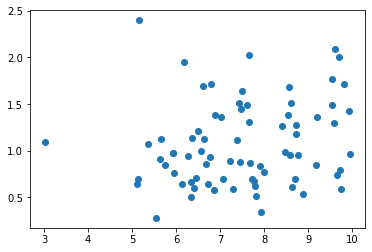

In [8]:
plt.scatter(data['经验值'],data['基金经理总收益'])

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(data['经验值'],data['1年内夏普比率'],train_size=0.8)
X_train.head()
X_train.shape

(60,)

In [15]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [16]:
a = model.intercept_
b = model.coef_
a = float(a)
b = float(b)
print('该模型的简单线性回归方程为y = {} + {} * x'.format(a, b))

该模型的简单线性回归方程为y = 2.3493405483030623 + -0.011283518994907114 * x


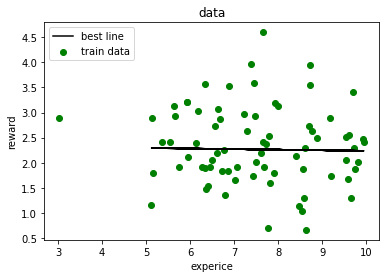

In [17]:
plt.scatter(data['经验值'],data['1年内夏普比率'],color='green',label='train data')
plt.ylabel('reward')
plt.xlabel('experice')
plt.title('data')
#绘制最佳拟合曲线
Y_train_pred = model.predict(X_train)
plt.plot(X_train, Y_train_pred, color = 'black', label = 'best line')

#来个图例
plt.legend(loc = 2)

plt.show()

In [18]:
model.score(X_test,Y_test)

-0.31894228743780806